# Building Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
boston_bldg_all = pd.read_csv('data/boston_building_inventory.csv')
boston_bldg_all.head()

/Users/Quentin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,40,44,47,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,pid_long,cm_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,94001,2200577000,NaN,Convention/Assembly,"Convention/Assembly, 1950-1979",Public & Quasi-Public,"< 25,000 sqft",1950-1979,525,WESTERN,...,f,f,f,f,f,f,f,f,f,0
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [32]:
boston_bldg = boston_bldg_all[['id', 'building_typology', 'use_class', 'year_built_class', 'st_name', 'st_name_suf', 'ptype', 'lu', 'ct_perc_children_under_5', 'ct_perc_over_65', 'ct_perc_income_200000_or_more', 'ct_perc_low_to_no_income']]
boston_bldg

,id,building_typology,use_class,year_built_class,st_name,st_name_suf,ptype,lu,ct_perc_children_under_5,ct_perc_over_65,ct_perc_income_200000_or_more,ct_perc_low_to_no_income
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51137,Single-Family,Residential,1915-1949,EVERETT,ST,101.0,R1,20.926988,9.145869,4.186655,37.219036
2,18045,Single-Family,Residential,Pre-1915,ESSEX,ST,101.0,R1,21.730217,16.892169,18.404908,19.762198
3,94001,Convention/Assembly,Public & Quasi-Public,1950-1979,WESTERN,AV,941.0,E,NaN,NaN,NaN,NaN
4,92940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.926988,9.145869,4.186655,37.219036
...,...,...,...,...,...,...,...,...,...,...,...,...
98925,66236,Multi-Family (2 units),Residential,1980-present,NaN,NaN,102.0,CD,10.828648,14.910780,4.820694,38.572476
98926,68980,Single-Family,Residential,1980-present,AVALON,RD,101.0,R1,19.217745,17.660007,10.875706,6.417203
98927,95554,Single-Family,Residential,1980-present,GERRISH,ST,101.0,R1,10.218978,13.029197,10.531221,13.832117
98928,58753,Multi-Family (2 units),Residential,1980-present,NaN,NaN,102.0,CD,21.818650,6.671819,23.878365,19.732097


In [54]:
boston_bldg['st_name'] = boston_bldg['st_name'].str.strip()
boston_bldg['st_name_suf'] = boston_bldg['st_name_suf'].str.strip()
boston_bldg['st_loc'] = boston_bldg['st_name'] + ' ' + boston_bldg['st_name_suf']
boston_bldg.dropna(subset=['st_loc'], inplace=True)
boston_bldg.head()

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_23320/1542254690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_bldg['st_name'] = boston_bldg['st_name'].str.strip()
/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_23320/1542254690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_bldg['st_name_suf'] = boston_bldg['st_name_suf'].str.strip()
/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_23320/1542254690.py:3: SettingWithCopyWarning: 
A value is trying to 

,id,building_typology,use_class,year_built_class,st_name,st_name_suf,ptype,lu,ct_perc_children_under_5,ct_perc_over_65,ct_perc_income_200000_or_more,ct_perc_low_to_no_income,st_loc
1,51137,Single-Family,Residential,1915-1949,EVERETT,ST,101.0,R1,20.926988,9.145869,4.186655,37.219036,EVERETT ST
2,18045,Single-Family,Residential,Pre-1915,ESSEX,ST,101.0,R1,21.730217,16.892169,18.404908,19.762198,ESSEX ST
3,94001,Convention/Assembly,Public & Quasi-Public,1950-1979,WESTERN,AV,941.0,E,NaN,NaN,NaN,NaN,WESTERN AV
5,29815,Vacant,Vacant,NaN,SEARLE,RD,132.0,RL,22.720072,15.614392,24.619565,4.254356,SEARLE RD
6,75767,Vacant,Vacant,NaN,HYDE PARK,AV,390.0,CL,24.054422,10.503401,5.499276,19.619048,HYDE PARK AV


In [56]:
boston_bldg.to_csv('prep_data/boston_bldg_st.csv', encoding='utf-8', index=False)

In [60]:
# group by use_class
boston_bldg_by_use_class = boston_bldg.groupby(['st_loc', 'use_class']).size()
boston_bldg_by_use_class.to_csv('prep_data/boston_bldg_by_use_class.csv', encoding='utf-8')
boston_bldg_by_use_class

st_loc      use_class              
A ST        Commercial                 10
            Industrial                  1
            Public & Quasi-Public       2
            Residential (Mixed-Use)     3
            Vacant                     16
                                       ..
ZAMORA ST   Vacant                      2
ZEIGLER ST  Commercial                  1
            Residential                 2
            Vacant                      2
ZELLER ST   Residential                25
Length: 8438, dtype: int64

In [61]:
# group by building_typology
boston_bldg_by_building_typology = boston_bldg.groupby(['st_loc', 'building_typology']).size()
boston_bldg_by_building_typology.to_csv('prep_data/boston_bldg_by_building_typology.csv', encoding='utf-8')
boston_bldg_by_building_typology

st_loc      building_typology      
A ST        Garage                      4
            Medical/Lab/Production      1
            Office                      2
            Residential (Mixed-Use)     3
            Restaurant                  1
                                       ..
ZEIGLER ST  Multi-Family (3 units)      1
            Retail                      1
            Vacant                      2
ZELLER ST   Multi-Family (2 units)      5
            Single-Family              20
Length: 13348, dtype: int64

In [69]:
# group by ptype
boston_bldg_by_ptype = boston_bldg.groupby(['st_loc', 'ptype']).size()
boston_bldg_by_ptype.to_csv('prep_data/boston_bldg_by_ptype.csv', encoding='utf-8')
boston_bldg_by_ptype

st_loc      ptype
A ST        13.0      1
            25.0      2
            317.0     3
            326.0     1
            332.0     1
                     ..
ZEIGLER ST  132.0     1
            319.0     1
            390.0     1
ZELLER ST   101.0    20
            104.0     5
Length: 18241, dtype: int64

In [62]:
# group by children_under_5
boston_bldg_by_children_under_5 = boston_bldg[['st_loc', 'ct_perc_children_under_5']].groupby(['st_loc']).agg(['mean'])
boston_bldg_by_children_under_5.to_csv('prep_data/boston_bldg_by_children_under_5.csv', encoding='utf-8')
boston_bldg_by_children_under_5

,ct_perc_children_under_5
,mean
st_loc,
A ST,7.760494
ABBOT ST,32.859579
ABBOTSFORD ST,22.600321
ABBY RD,9.167842
ABERDEEN ST,0.409707
...,...
YUILL CI,17.664093
ZAMORA CT,8.589871


In [63]:
# group by over_65
boston_bldg_by_over_65 = boston_bldg[['st_loc', 'ct_perc_over_65']].groupby(['st_loc']).agg(['mean'])
boston_bldg_by_over_65.to_csv('prep_data/boston_bldg_by_over_65.csv', encoding='utf-8')
boston_bldg_by_over_65

,ct_perc_over_65
,mean
st_loc,
A ST,6.758466
ABBOT ST,5.760849
ABBOTSFORD ST,10.016051
ABBY RD,9.144335
ABERDEEN ST,1.134573
...,...
YUILL CI,6.322394
ZAMORA CT,11.866931


In [64]:
# group by low_income
boston_bldg_by_low_income = boston_bldg[['st_loc', 'ct_perc_low_to_no_income']].groupby(['st_loc']).agg(['mean'])
boston_bldg_by_low_income.to_csv('prep_data/boston_bldg_by_low_income.csv', encoding='utf-8')
boston_bldg_by_low_income

,ct_perc_low_to_no_income
,mean
st_loc,
A ST,17.455992
ABBOT ST,44.836081
ABBOTSFORD ST,35.345104
ABBY RD,17.207334
ABERDEEN ST,28.206744
...,...
YUILL CI,7.722008
ZAMORA CT,20.357498


In [65]:
# group by high_income
boston_bldg_by_high_income = boston_bldg[['st_loc', 'ct_perc_income_200000_or_more']].groupby(['st_loc']).agg(['mean'])
boston_bldg_by_high_income.to_csv('prep_data/boston_bldg_by_high_income.csv', encoding='utf-8')
boston_bldg_by_high_income

,ct_perc_income_200000_or_more
,mean
st_loc,
A ST,24.717626
ABBOT ST,0.618459
ABBOTSFORD ST,1.061571
ABBY RD,7.173252
ABERDEEN ST,5.869565
...,...
YUILL CI,9.868421
ZAMORA CT,9.558824


In [66]:
# extract specific category
inventory_code = pd.read_csv('data/boston_building_inventory_code.csv')
inventory_code

,Use Code,Use Code Category,Use Code Description,Use Class
0,10,Multiple Use Property,Condo Multi-Use,Residential (Mixed-Use)
1,12,Multiple Use Property,Vacant Land,NaN
2,13,Multiple Use Property,Res/Commercial Use,Residential (Mixed-Use)
3,19,Multiple Use Property,Res/Exempt Use,Residential (Mixed-Use)
4,25,Multiple Use Property,Res/Comm Mixed Use,Residential (Mixed-Use)
...,...,...,...,...
350,A,Average,NaN,NaN
351,E,Excellent,NaN,NaN
352,F,Fair,NaN,NaN
353,G,Good,NaN,NaN


In [72]:
inventory_code = inventory_code[inventory_code.index < 249]
inventory_code

,Use Code,Use Code Category,Use Code Description,Use Class
0,10,Multiple Use Property,Condo Multi-Use,Residential (Mixed-Use)
1,12,Multiple Use Property,Vacant Land,NaN
2,13,Multiple Use Property,Res/Commercial Use,Residential (Mixed-Use)
3,19,Multiple Use Property,Res/Exempt Use,Residential (Mixed-Use)
4,25,Multiple Use Property,Res/Comm Mixed Use,Residential (Mixed-Use)
...,...,...,...,...
244,991,Exempt Property Type,Office Condo,Commercial
245,992,Exempt Property Type,Residential Condo,Residential
246,993,Exempt Property Type,Industrial Condo,Industrial
247,995,Exempt Property Type,Condo Main,NaN


In [79]:
shopping = ['321', '322', '323', '324', '325'] # Shopping Center, Supermarket, Retail Store
gas_station = ['333'] # Gas Station
club = ['329', '361'] # Bar/Tavern/Pub, Night Club
education = ['378', '904', '976', '977'] # School, College, Pri School / College
hospital = ['305', '309', '979'] # Hospital, Medical Clinic

parking_area = list(inventory_code[inventory_code['Use Code Description'].str.contains('Parking')]['Use Code'])
parking_area

['108', '116', '119', '336', '337', '339', '359', '387', '961', '962']

In [80]:
# All kinds of parking area
inventory_code[inventory_code['Use Code Description'].str.contains('Parking')]

,Use Code,Use Code Category,Use Code Description,Use Class
15,108,Residential Property,Condo Parking,Residential
23,116,Apartment Property,Res Parking Garage,Residential
26,119,Apartment Property,Res Parking Lot,Residential
77,336,Commercial Property,Parking Garage,Commercial
78,337,Commercial Property,Parking Lot,Commercial
80,339,Commercial Property,Parking Garage,Commercial
99,359,Commercial Property,Condo Parking,Commercial
127,387,Commercial Property,Pay Parking Lot,Commercial
215,961,Exempt Property Type,Parking Garage,Public & Quasi-Public
216,962,Exempt Property Type,Parking Lot,Public & Quasi-Public


In [96]:
boston_bldg_category = boston_bldg.copy()
boston_bldg_category = boston_bldg_category.astype({'ptype': int}).astype({'ptype': str})

def get_category(x):
    if x in shopping:
        return 'shopping'
    elif x in gas_station:
        return 'gas station'
    elif x in club:
        return 'club'
    elif x in education:
        return 'education'
    elif x in hospital:
        return 'hospital'
    elif x in parking_area:
        return 'parking area'

boston_bldg_category['category'] = boston_bldg_category.apply(lambda x: get_category(x.ptype), axis=1)
boston_bldg_category

,id,building_typology,use_class,year_built_class,st_name,st_name_suf,ptype,lu,ct_perc_children_under_5,ct_perc_over_65,ct_perc_income_200000_or_more,ct_perc_low_to_no_income,st_loc,category
1,51137,Single-Family,Residential,1915-1949,EVERETT,ST,101,R1,20.926988,9.145869,4.186655,37.219036,EVERETT ST,None
2,18045,Single-Family,Residential,Pre-1915,ESSEX,ST,101,R1,21.730217,16.892169,18.404908,19.762198,ESSEX ST,None
3,94001,Convention/Assembly,Public & Quasi-Public,1950-1979,WESTERN,AV,941,E,NaN,NaN,NaN,NaN,WESTERN AV,None
5,29815,Vacant,Vacant,NaN,SEARLE,RD,132,RL,22.720072,15.614392,24.619565,4.254356,SEARLE RD,None
6,75767,Vacant,Vacant,NaN,HYDE PARK,AV,390,CL,24.054422,10.503401,5.499276,19.619048,HYDE PARK AV,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98922,31503,Single-Family,Residential,1980-present,GLENELLEN,RD,101,R1,15.441018,17.597585,12.048193,8.194954,GLENELLEN RD,None
98924,51491,Single-Family,Residential,1980-present,TAYLOR,TE,101,R1,23.207269,11.738703,6.573070,32.293713,TAYLOR TE,None
98926,68980,Single-Family,Residential,1980-present,AVALON,RD,101,R1,19.217745,17.660007,10.875706,6.417203,AVALON RD,None
98927,95554,Single-Family,Residential,1980-present,GERRISH,ST,101,R1,10.218978,13.029197,10.531221,13.832117,GERRISH ST,None


In [97]:
set(boston_bldg_category.category)

{None,
 'club',
 'education',
 'gas station',
 'hospital',
 'parking area',
 'shopping'}

In [98]:
boston_bldg_category.dropna(subset=['category'], inplace=True)
boston_bldg_category

,id,building_typology,use_class,year_built_class,st_name,st_name_suf,ptype,lu,ct_perc_children_under_5,ct_perc_over_65,ct_perc_income_200000_or_more,ct_perc_low_to_no_income,st_loc,category
42,79096,Garage,Commercial,NaN,BARBARA,ST,337,CL,12.867327,7.007477,16.701828,19.961746,BARBARA ST,parking area
57,28345,Garage,Commercial,NaN,CHELSEA,ST,337,CL,19.693606,4.240675,4.739336,27.264654,CHELSEA ST,parking area
83,51081,Garage,Commercial,NaN,SPICE,ST,337,CL,13.338789,13.011457,26.015681,15.834697,SPICE ST,parking area
85,96948,Garage,Commercial,NaN,WASHINGTON,ST,337,CL,16.603664,8.897935,6.508549,35.504507,WASHINGTON ST,parking area
86,41481,Garage,Commercial,NaN,DUDLEY,ST,337,CL,30.579216,7.580920,2.251656,36.797274,DUDLEY ST,parking area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98861,36500,Medical/Lab/Production,Public & Quasi-Public,NaN,N ANDERSON,ST,979,E,3.163618,22.194760,21.120363,22.540781,N ANDERSON ST,hospital
98870,10398,Garage,Commercial,NaN,S HUNTINGTON,AV,337,CL,12.867327,7.007477,16.701828,19.961746,S HUNTINGTON AV,parking area
98876,23699,Convention/Assembly,Public & Quasi-Public,NaN,BAY STATE,RD,977,E,0.744145,0.350186,7.660455,8.579558,BAY STATE RD,education
98877,15803,Convention/Assembly,Public & Quasi-Public,Pre-1915,BAY STATE,RD,977,E,0.744145,0.350186,7.660455,8.579558,BAY STATE RD,education


In [99]:
boston_bldg_category.to_csv('prep_data/boston_bldg_category.csv', encoding='utf-8', index=False)

In [7]:
boston_crime = pd.read_csv('data/boston_crime.csv')
boston_crime

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_51817/2832661799.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  boston_crime = pd.read_csv('data/boston_crime.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I152071100,2611,Other,ABDUCTION - INTICING,D4,151,NaN,2015-08-25 14:00:00,2015,8,Tuesday,14,Part Two,BERKELEY ST,42.346465,-71.070704,"(42.34646505, -71.07070436)"
1,I152054466,2611,Other,ABDUCTION - INTICING,B2,319,NaN,2015-07-01 20:30:00,2015,7,Wednesday,20,Part Two,NAZING ST,42.306641,-71.085850,"(42.30664081, -71.08584976)"
2,I162018570,2611,Other,ABDUCTION - INTICING,D4,,NaN,2016-03-09 17:28:00,2016,3,Wednesday,17,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192018747,2611,Other,ABDUCTION - INTICING,B2,179,NaN,2019-03-13 19:34:00,2019,3,Wednesday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
4,I162001276,2611,Other,ABDUCTION - INTICING,B3,428,NaN,2016-01-05 16:12:00,2016,1,Tuesday,16,Part Two,NORFOLK ST,42.280566,-71.088017,"(42.28056608, -71.08801662)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525570,202010180,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,613,0,2020-02-06 18:07:00,2020,2,Thursday,18,NaN,PILGRIM RD,42.338067,-71.109782,"(42.33806700, -71.10978200)"
525571,202016544,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B3,450,0,2020-02-29 19:08:00,2020,2,Saturday,19,NaN,ROSEDALE ST,42.292441,-71.073206,"(42.29244100, -71.07320600)"
525572,202017756,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,183,0,2020-03-05 03:39:00,2020,3,Thursday,3,NaN,NaN,42.320181,-71.071294,"(42.32018100, -71.07129400)"
525573,202007355,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,326,0,2020-01-28 02:28:00,2020,1,Tuesday,2,NaN,BLUE HILL AVENUE,NaN,NaN,"(0.00000000, 0.00000000)"


In [15]:
boston_crime_street_year = boston_crime.groupby(['STREET']).size()
boston_crime_street_year = boston_crime_street_year.reset_index()
boston_crime_street_year.columns = ['street', 'crime_count']
boston_crime_street_year

,street,crime_count
0,ALBANY ST,42
1,BLUE HILL AVE,8
2,COLUMBUS AVE,2
3,COMMONWEALTH AVE,10
4,MASSACHUSETTS AVE,27
...,...,...
5406,ZEIGLER ST & BETHUNE WAY,1
5407,ZEIGLER ST & WINSLOW ST,1
5408,ZELLER ST,6
5409,ZIEGLER,1


In [28]:
boston_crime_street_year = boston_crime_street_year.astype({'street':str})

In [3]:
# line chart for children under 5
boston_under_5 = pd.read_csv('prep_data/boston_bldg_by_children_under_5.csv')
boston_under_5

,Unnamed: 0,ct_perc_children_under_5
0,NaN,mean
1,st_loc,NaN
2,A ST,7.760494063806451
3,ABBOT ST,32.85957931
4,ABBOTSFORD ST,22.60032103
...,...,...
4072,YUILL CI,17.66409266
4073,ZAMORA CT,8.589870904
4074,ZAMORA ST,8.589870904
4075,ZEIGLER ST,29.704797050000003


In [16]:
boston_under_5.columns = ['street', 'perc_under_5']
boston_under_5

,street,perc_under_5
0,NaN,mean
1,st_loc,NaN
2,A ST,7.760494063806451
3,ABBOT ST,32.85957931
4,ABBOTSFORD ST,22.60032103
...,...,...
4072,YUILL CI,17.66409266
4073,ZAMORA CT,8.589870904
4074,ZAMORA ST,8.589870904
4075,ZEIGLER ST,29.704797050000003


In [34]:
boston_under_5.dropna(inplace=True)
boston_under_5 = boston_under_5.astype({'street': str})

In [41]:
boston_under_5_street_crime = pd.merge(boston_under_5, boston_crime_street_year)
boston_under_5_street_crime

,street,perc_under_5,crime_count
0,A ST,7.760494063806451,339
1,ABBOT ST,32.85957931,285
2,ABBOTSFORD ST,22.60032103,176
3,ABBY RD,9.167842031000001,5
4,ABERDEEN ST,0.409706902,29
...,...,...,...
2883,YORKTOWN ST,19.35197514,2
2884,ZAMORA CT,8.589870904,2
2885,ZAMORA ST,8.589870904,14
2886,ZEIGLER ST,29.704797050000003,258


In [45]:
boston_under_5_street_crime = boston_under_5_street_crime.astype({'perc_under_5': float})
boston_under_5_street_crime.sort_values(by='perc_under_5', inplace=True)
boston_under_5_street_crime

,street,perc_under_5,crime_count
2565,TIDE ST,0.000000,8
892,ELKINS ST,0.000000,8
754,DESIGN CENTER PL,0.000000,6
832,E BOUNDARY RD,0.000000,1
415,BUSSEY ST,0.000000,76
...,...,...,...
103,ARBUTUS ST,40.725953,102
1402,IRMA ST,40.725953,99
1482,KINGBIRD RD,40.725953,108
382,BROOKVIEW ST,40.725953,93


In [57]:
boston_under_5_street_crime['group'] = boston_under_5_street_crime['perc_under_5'].apply(lambda x: int(x / 5))
boston_under_5_street_crime

,street,perc_under_5,crime_count,group
2565,TIDE ST,0.000000,8,0
892,ELKINS ST,0.000000,8,0
754,DESIGN CENTER PL,0.000000,6,0
832,E BOUNDARY RD,0.000000,1,0
415,BUSSEY ST,0.000000,76,0
...,...,...,...,...
103,ARBUTUS ST,40.725953,102,8
1402,IRMA ST,40.725953,99,8
1482,KINGBIRD RD,40.725953,108,8
382,BROOKVIEW ST,40.725953,93,8


In [59]:
boston_under_5_street_crime_group = boston_under_5_street_crime.groupby('group').agg({'crime_count': 'sum'}).reset_index()
boston_under_5_street_crime_group

,group,crime_count
0,0,12460
1,1,58276
2,2,48287
3,3,53035
4,4,101640
5,5,43873
6,6,27775
7,7,3971
8,8,2667


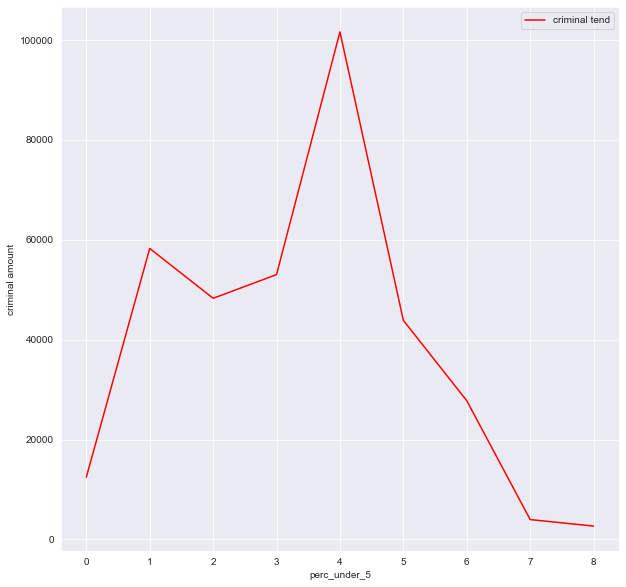

In [60]:
plt.figure(figsize=(10, 10))
plt.plot(boston_under_5_street_crime_group['group'], boston_under_5_street_crime_group['crime_count'],color = 'r',label="criminal tend")
plt.xlabel("perc_under_5")
plt.ylabel("criminal amount")
plt.legend(loc = "best")
plt.show()

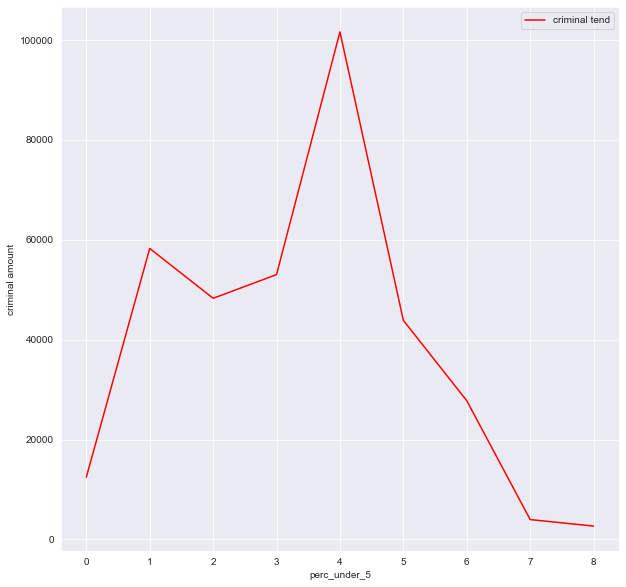

In [61]:
# line chart for under 5
def line_chart_for_street_avg_group(file_path, crime_street_year, y_label):
    bldg_group = pd.read_csv(file_path)
    bldg_group.columns = ['street', y_label]
    bldg_group.dropna(inplace=True)
    bldg_group = bldg_group.astype({'street': str})
    bldg_group_street_crime = pd.merge(bldg_group, crime_street_year)
    bldg_group_street_crime = bldg_group_street_crime.astype({y_label: float})
    bldg_group_street_crime.sort_values(by=y_label, inplace=True)
    bldg_group_street_crime['chart_group'] = bldg_group_street_crime[y_label].apply(lambda x: int(x / 5))
    bldg_group_street_crime_group = bldg_group_street_crime.groupby('chart_group').agg({'crime_count': 'sum'}).reset_index()
    plt.figure(figsize=(10, 10))
    plt.plot(bldg_group_street_crime_group['chart_group'], bldg_group_street_crime_group['crime_count'],color = 'r',label="criminal tend")
    plt.xlabel(y_label)
    plt.ylabel("criminal amount")
    plt.legend(loc = "best")
    plt.show()

line_chart_for_street_avg_group('prep_data/boston_bldg_by_children_under_5.csv', boston_crime_street_year, 'perc_under_5')

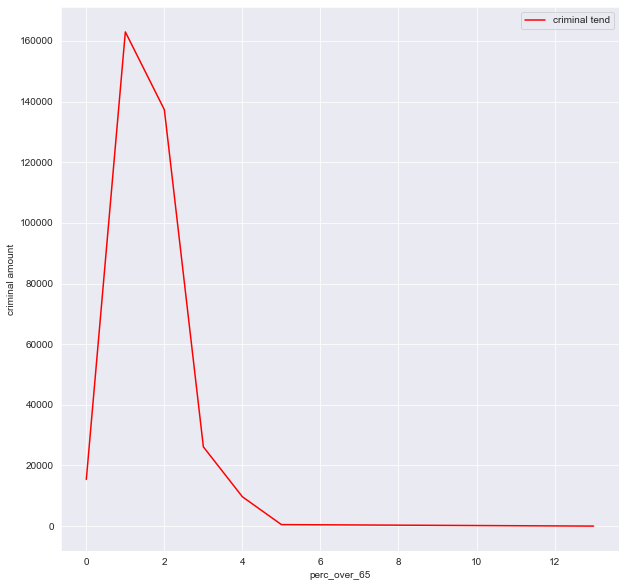

In [62]:
# line chart for over 65
line_chart_for_street_avg_group('prep_data/boston_bldg_by_over_65.csv', boston_crime_street_year, 'perc_over_65')

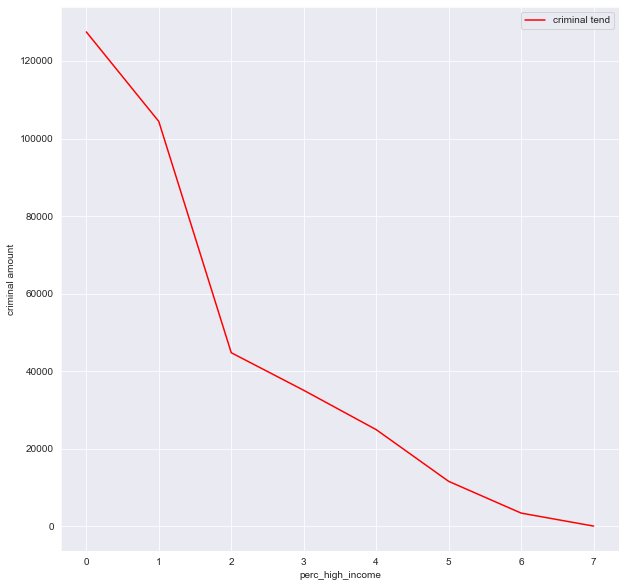

In [63]:
# line chart for high income
line_chart_for_street_avg_group('prep_data/boston_bldg_by_high_income.csv', boston_crime_street_year, 'perc_high_income')

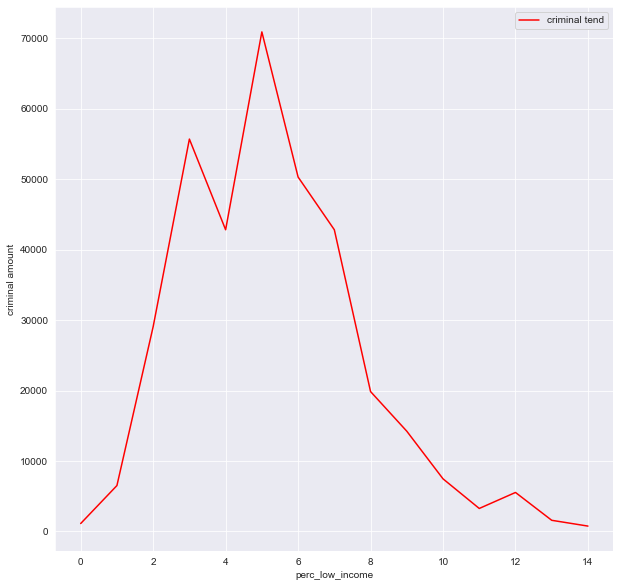

In [64]:
# line chart for low income
line_chart_for_street_avg_group('prep_data/boston_bldg_by_low_income.csv', boston_crime_street_year, 'perc_low_income')